In [11]:
# Notebook: Visualizações Firestore - Dados em Tempo Real
# Configuração inicial e imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import firestore
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("Set2")

# Configurar credenciais
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'credentials.json'

print("🔥 Notebook Firestore - Visualizações em Tempo Real")
print("=" * 50)
print("✅ Bibliotecas importadas com sucesso!")

🔥 Notebook Firestore - Visualizações em Tempo Real
✅ Bibliotecas importadas com sucesso!


In [12]:
# Célula 2: Conectar ao Firestore e buscar métricas
try:
    # Conectar ao Firestore (ajuste o project_id se for diferente)
    db = firestore.Client(project='trabalho-final-bd-463916')
    print("✅ Conectado ao Firestore!")

    # Buscar métricas do dashboard
    metricas_doc = db.collection('metricas_tempo_real').document('dashboard').get()

    if metricas_doc.exists:
        metricas = metricas_doc.to_dict()
        print("✅ Métricas carregadas!")
    else:
        print("❌ Documento de métricas não encontrado")
        metricas = {} # Define como dicionário vazio para evitar erros

except Exception as e:
    print(f"❌ Erro: {e}")

✅ Conectado ao Firestore!
✅ Métricas carregadas!


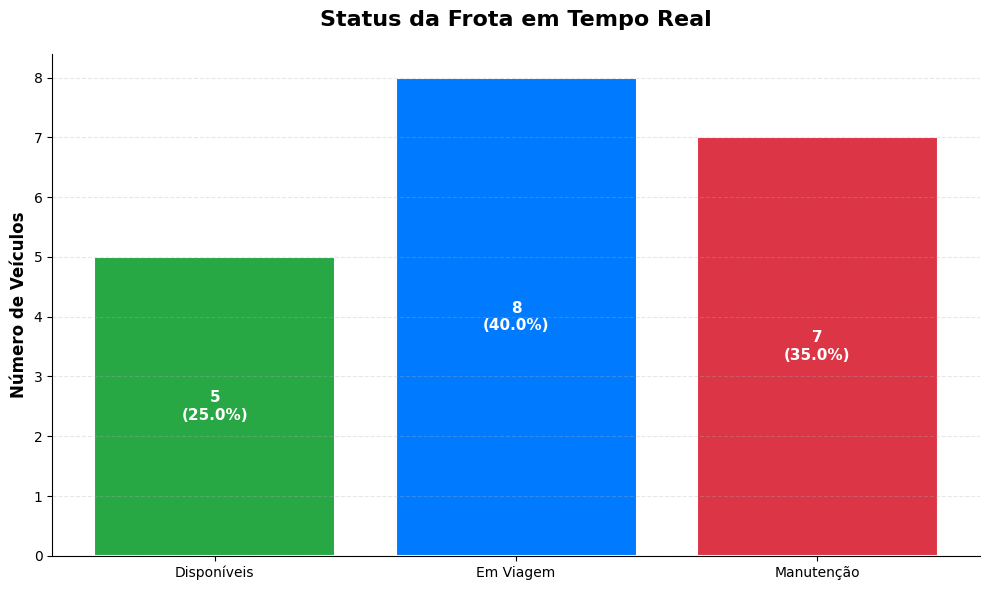

📊 Última atualização: 25/06/2025 às 08:04:04
🚛 Total da frota: 20 veículos
👨‍✈️ Total de motoristas: 30 motoristas


In [13]:
# Célula 3: Gráfico Profissional - Status da Frota em Tempo Real (CORRIGIDO)
if 'metricas' in locals():
    # Preparar dados para visualização (usando as chaves corretas)
    status_labels = ['Disponíveis', 'Em Viagem', 'Manutenção']
    status_values = [
        metricas.get('veiculos_disponiveis', 0),
        metricas.get('veiculos_em_viagem', 0),
        metricas.get('veiculos_manutencao', 0)
    ]

    # Calcular percentuais
    total_veiculos = metricas.get('frota_total', sum(status_values))
    percentuais = [round((val/total_veiculos)*100, 1) if total_veiculos > 0 else 0 for val in status_values]

    # Cores 
    cores = ['#28a745', '#007bff', '#dc3545']  # Verde, Azul, Vermelho

    # Criar gráfico 
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(status_labels, status_values, color=cores, edgecolor='white', linewidth=1.5)

    # Configurar título e labels
    ax.set_title('Status da Frota em Tempo Real', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Número de Veículos', fontsize=12, fontweight='bold')

    # Adicionar valores e percentuais 
    for bar, value, perc in zip(bars, status_values, percentuais):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height/2, f'{value}\n({perc}%)',
                ha='center', va='center', fontweight='bold', fontsize=11, color='white')

    # Estilização 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

    print(f"📊 Última atualização: {datetime.now().strftime('%d/%m/%Y às %H:%M:%S')}")
    print(f"🚛 Total da frota: {total_veiculos} veículos")
    print(f"👨‍✈️ Total de motoristas: {metricas.get('motoristas_total', 'N/A')} motoristas") # NOVO
else:
    print("❌ Dados de métricas não disponíveis para gerar gráfico")

In [14]:
# Célula 4: Buscar e analisar dados de alertas (CORRIGIDO E SIMPLIFICADO)
try:
    print("🚨 Carregando dados de alertas...")
    alertas_ref = db.collection('alertas')
    alertas_docs = list(alertas_ref.stream())

    if alertas_docs:
        alertas_data = [doc.to_dict() for doc in alertas_docs]
        df_alertas = pd.DataFrame(alertas_data)

        print(f"✅ {len(df_alertas)} alertas carregados!")
        print(f"\n📊 Resumo por prioridade:")
        prioridade_counts = df_alertas['prioridade'].value_counts()
        for prioridade, count in prioridade_counts.items():
            print(f"  {prioridade}: {count} alertas")

    else:
        print("ℹ️ Nenhum alerta encontrado")

except Exception as e:
    print(f"❌ Erro carregando alertas: {e}")

🚨 Carregando dados de alertas...
✅ 51 alertas carregados!

📊 Resumo por prioridade:
  Alta: 21 alertas
  Média: 19 alertas
  Baixa: 11 alertas


📍 Carregando localizações dos veículos...


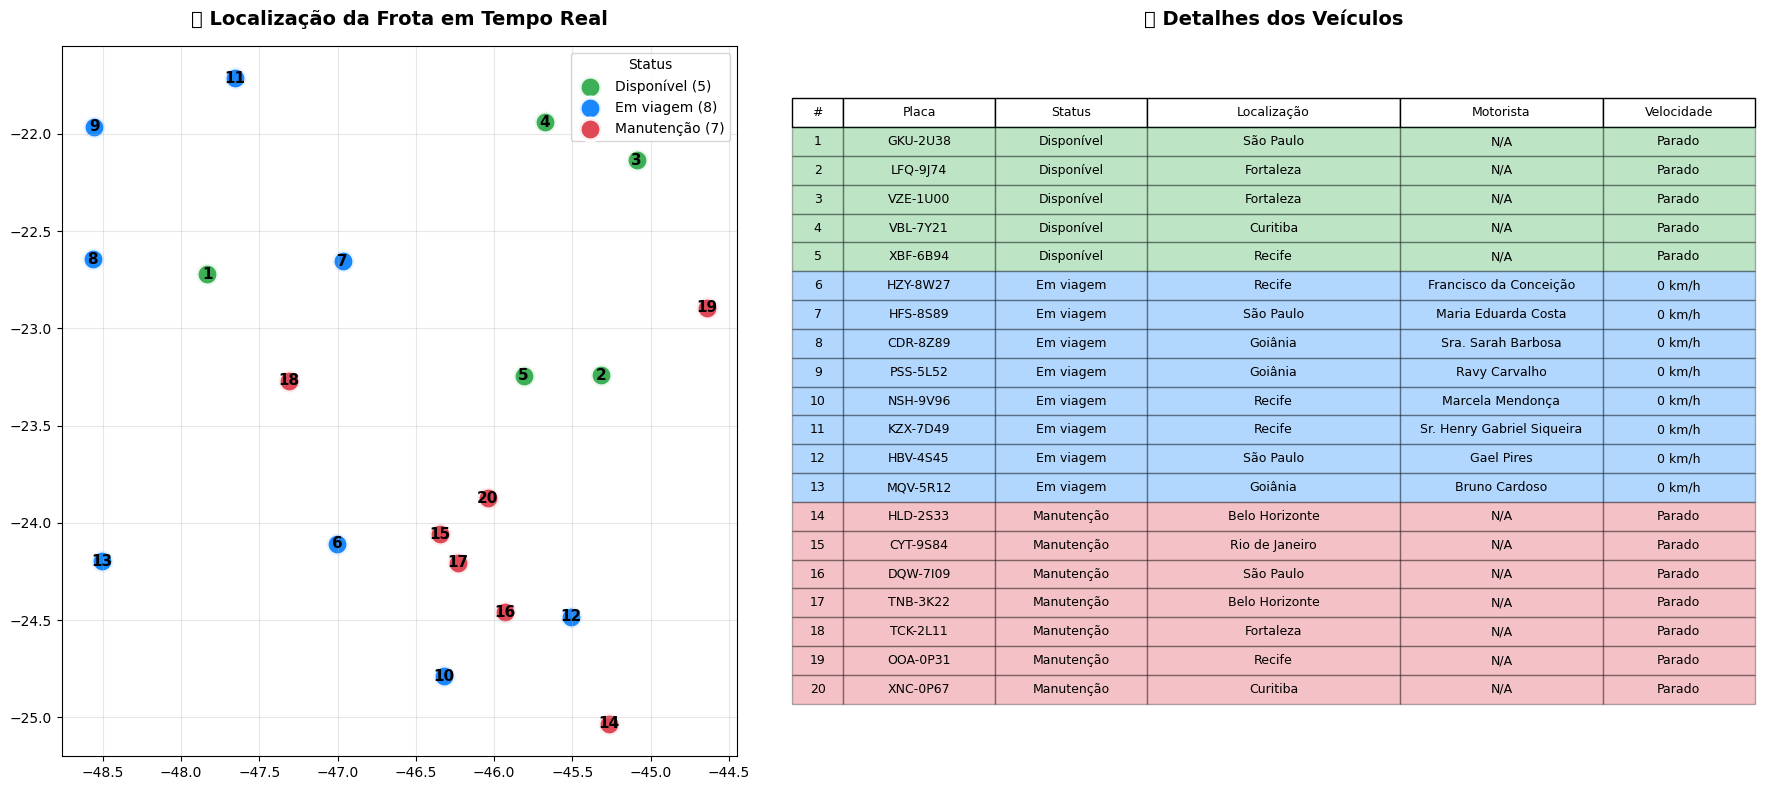

🗺️ 20 veículos mapeados.


In [15]:
# Célula 5: Mapa de Localização com Tabela de Detalhes (ATUALIZADO)
try:
    print("📍 Carregando localizações dos veículos...")
    veiculos_ref = db.collection('veiculos_status')
    veiculos_docs = list(veiculos_ref.stream())

    if veiculos_docs:
        localizacao_data = []
        for doc in veiculos_docs:
            data = doc.to_dict()
            viagem_atual = data.get('viagem_atual', {}) # Pega o dict da viagem
            localizacao_data.append({
                'placa': data.get('placa', 'N/A'),
                'status': data.get('status', 'N/A'),
                'localizacao': data.get('localizacao_atual', 'N/A'),
                'lat': data.get('latitude', 0), # Chave corrigida
                'lng': data.get('longitude', 0), # Chave corrigida
                'combustivel': data.get('combustivel_nivel', 0),
                'velocidade': viagem_atual.get('velocidade_atual', 0), # Chave corrigida
                'motorista': viagem_atual.get('motorista_nome', 'N/A') # NOVO
            })

        df_localizacao = pd.DataFrame(localizacao_data)

        # Ordenar para visualização (Manutenção por cima de Viagem, etc.)
        status_priority = {'Manutenção': 3, 'Em viagem': 2, 'Disponível': 1}
        df_localizacao['priority'] = df_localizacao['status'].map(status_priority).fillna(0)
        df_localizacao = df_localizacao.sort_values('priority', ascending=True)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [2, 3]})

        # === MAPA DE LOCALIZAÇÃO ===
        status_colors = {'Disponível': '#28a745', 'Em viagem': '#007bff', 'Manutenção': '#dc3545'}
        for status, group in df_localizacao.groupby('status'):
            ax1.scatter(group['lng'], group['lat'], c=status_colors.get(status, 'gray'), 
                        label=f'{status} ({len(group)})', s=250, alpha=0.9, edgecolors='white', linewidth=3)
        
        # Adicionar números aos pontos
        for idx, row in df_localizacao.iterrows():
            ax1.annotate(str(df_localizacao.index.get_loc(idx)+1), (row['lng'], row['lat']), 
                         ha='center', va='center', fontweight='bold', fontsize=11, color='black')

        ax1.set_title('🗺️ Localização da Frota em Tempo Real', fontsize=14, fontweight='bold', pad=15)
        ax1.legend(title='Status')
        ax1.grid(True, alpha=0.3)

        # === TABELA DE DETALHES ===
        ax2.axis('off')
        table_data = []
        for idx, row in df_localizacao.iterrows():
            vel_text = f"{row['velocidade']} km/h" if row['status'] == 'Em viagem' else "Parado"
            table_data.append([
                df_localizacao.index.get_loc(idx)+1,
                row['placa'],
                row['status'],
                row['localizacao'],
                row['motorista'], # NOVO
                vel_text
            ])
        
        table = ax2.table(cellText=table_data,
                          colLabels=['#', 'Placa', 'Status', 'Localização', 'Motorista', 'Velocidade'], # Coluna Motorista adicionada
                          cellLoc='center', loc='center', colWidths=[0.05, 0.15, 0.15, 0.25, 0.2, 0.15])
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)

        # Colorir linhas da tabela
        for i, row_data in enumerate(table_data):
            color = status_colors.get(row_data[2], 'lightgray')
            for j in range(len(row_data)):
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_alpha(0.3)

        ax2.set_title('📋 Detalhes dos Veículos', fontsize=14, fontweight='bold', pad=15)
        plt.tight_layout()
        plt.show()
        print(f"🗺️ {len(df_localizacao)} veículos mapeados.")
    else:
        print("❌ Nenhum veículo encontrado para mapear")

except Exception as e:
    print(f"❌ Erro: {e}")
